In [433]:
import pandas as pd


df = pd.read_csv('cleaned_dataset.csv')
import pandas as pd

df['locality'] = df['locality'].str.title()
df = df[df['house_index'] != 19838]
df = df[df['house_index'] != 19839]
df = df[df['house_index'] != 5356]



In [434]:
#Printing df informations
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16110 entries, 0 to 16112
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_index       16110 non-null  int64  
 1   bedrooms          16110 non-null  int64  
 2   property_type     16110 non-null  object 
 3   property_subtype  16110 non-null  object 
 4   locality          16110 non-null  object 
 5   postal_code       16110 non-null  object 
 6   street            15697 non-null  object 
 7   number            15596 non-null  object 
 8   box               5027 non-null   object 
 9   kitchen           16110 non-null  int64  
 10  facades           11575 non-null  float64
 11  price             16109 non-null  float64
 12  furnished         16110 non-null  int64  
 13  terrace           16110 non-null  int64  
 14  terraceSurface    11338 non-null  float64
 15  fireplace         16110 non-null  int64  
 16  fireplaceCount    16110 non-null  int64  
 17

In [435]:
#Map muncipality codes to postcodes
import csv

my_dict = {}

with open('postcode_municipality.csv', mode='r') as file:
    reader = csv.reader(file)
    
    next(reader)
    for row in reader:
        my_dict[row[0]] = row[1]

df['municipality_code'] = df['postal_code'].map(my_dict)


In [436]:
#Create region column
df = df[df['postal_code'].str.isnumeric()]
df['postal_code'] = df['postal_code'].astype('int64')
df['region'] = 'undefined'

for index, row in df.iterrows():
    if 1000 <= row['postal_code'] <= 1299:  # Brussels
        df.at[index, 'region'] = 'Brussels'
    elif 1300 <= row['postal_code'] <= 1499:  # Walloon Brabant (Wallonia)
        df.at[index, 'region'] = 'Wallonia'
    elif 1500 <= row['postal_code'] <= 1999:  # Flemish Brabant (Flanders)
        df.at[index, 'region'] = 'Flanders'
    elif 2000 <= row['postal_code'] <= 3999:  # Antwerp, East Flanders, Limburg, etc. (Flanders)
        df.at[index, 'region'] = 'Flanders'
    elif 4000 <= row['postal_code'] <= 7999:  # Liège, Hainaut, Luxembourg, etc. (Wallonia)  
        df.at[index, 'region'] = 'Wallonia'
    elif 8000 <= row['postal_code'] <= 9999:  # West Flanders (Flanders)
        df.at[index, 'region'] = 'Flanders'
    else:
        df.at[index, 'region'] = 'Unknown'




In [470]:
#Creating Province columns
df = df[df['postal_code'].str.isnumeric()]
df['postal_code'] = df['postal_code'].astype('int64')
df['province'] = 'undefined'

for index, row in df.iterrows():
    if 1000 <= row['postal_code'] <= 1299:
        df.at[index, 'province'] = 'Brussels'
    if 1300 <= row['postal_code'] <= 1499:
        df.at[index, 'province'] = 'Walloon Brabant'
    if 1500 <= row['postal_code'] <= 1999:
        df.at[index, 'province'] = 'Flemish Brabant'
    if 2000 <= row['postal_code'] <= 2999:
        df.at[index, 'province'] = 'Antwerp'
    if 3000 <= row['postal_code'] <= 3499:
        df.at[index, 'province'] = 'Flemish Brabant'
    if 3500 <= row['postal_code'] <= 3999:
        df.at[index, 'province'] = 'Limburg'
    if 4000 <= row['postal_code'] <= 4999:
        df.at[index, 'province'] = 'Liege'
    if 5000 <= row['postal_code'] <= 5999:
        df.at[index, 'province'] = 'Namur'
    if 6000 <= row['postal_code'] <= 6599:
        df.at[index, 'province'] = 'Hainaut'
    if 6600 <= row['postal_code'] <= 6999:
        df.at[index, 'province'] = 'Luxembourg'
    if 7000 <= row['postal_code'] <= 7999:
        df.at[index, 'province'] = 'Hainaut'
    if 8000 <= row['postal_code'] <= 8999:
        df.at[index, 'province'] = 'West Flanders'
    if 9000 <= row['postal_code'] <= 9999:
        df.at[index, 'province'] = 'East Flanders'


In [472]:
#Creating new binary columns for subtype of property and buildingstate
df['APARTMENT_BLOCK'] = (df['property_subtype'] == 'APARTMENT_BLOCK').astype(int)
df['GROUND_FLOOR'] = (df['property_subtype'] == 'GROUND_FLOOR').astype(int)
df['COUNTRY_COTTAGE'] = (df['property_subtype'] == 'COUNTRY_COTTAGE').astype(int)
df['MANSION'] = (df['property_subtype'] == 'MANSION').astype(int)
df['PENTHOUSE'] = (df['property_subtype'] == 'PENTHOUSE').astype(int)
df['EXCEPTIONAL_PROPERTY'] = (df['property_subtype'] == 'EXCEPTIONAL_PROPERTY').astype(int)
df['KOT'] = (df['property_subtype'] == 'KOT').astype(int)
df['LOFT'] = (df['property_subtype'] == 'LOFT').astype(int)
df['MANOR_HOUSE'] = (df['property_subtype'] == 'MANOR_HOUSE').astype(int)
df['SERVICE_FLAT'] = (df['property_subtype'] == 'SERVICE_FLAT').astype(int)
df['CHALET'] = (df['property_subtype'] == 'CHALET').astype(int)


df['AS_NEW'] = (df['buildingState'] == 'AS_NEW').astype(int)
df['GOOD'] = (df['buildingState'] == 'GOOD').astype(int)
df['JUST_RENOVATED'] = (df['buildingState'] == 'JUST_RENOVATED').astype(int)
df['TO_BE_DONE_UP'] = (df['buildingState'] == 'TO_BE_DONE_UP').astype(int)
df['TO_RENOVATE'] = (df['buildingState'] == 'TO_RENOVATE').astype(int)
df['TO_RESTORE'] = (df['buildingState'] == 'TO_RESTORE').astype(int)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16110 entries, 0 to 16112
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   house_index           16110 non-null  int64  
 1   bedrooms              16110 non-null  int64  
 2   property_type         16110 non-null  object 
 3   property_subtype      16110 non-null  object 
 4   locality              16110 non-null  object 
 5   postal_code           16110 non-null  int64  
 6   street                15697 non-null  object 
 7   number                15596 non-null  object 
 8   box                   5027 non-null   object 
 9   kitchen               16110 non-null  int64  
 10  facades               11575 non-null  float64
 11  price                 16109 non-null  float64
 12  furnished             16110 non-null  int64  
 13  terrace               16110 non-null  int64  
 14  terraceSurface        11338 non-null  float64
 15  fireplace             16

In [473]:
#Adding price per SQM column:
df['price_sqm']=df['price']/df['livingArea']

Average % of missing values across all columns is 11.72%
average % of missing values in price column is 0.006207324643078833
average % of missing values in bedrooms column is 0.0
average % of missing values in property_type column is 0.0
average % of missing values in property_subtype column is 0.0
average % of missing values in locality column is 0.0
average % of missing values in postal_code column is 0.0
average % of missing values in street column is 2.563625077591558
average % of missing values in kitchen column is 0.0
average % of missing values in facades column is 28.15021725636251
average % of missing values in furnished column is 0.0
average % of missing values in terrace column is 0.0
average % of missing values in terraceSurface column is 29.621353196772194
average % of missing values in fireplace column is 0.0
average % of missing values in fireplaceCount column is 0.0
average % of missing values in buildingState column is 16.90254500310366
average % of missing values in g

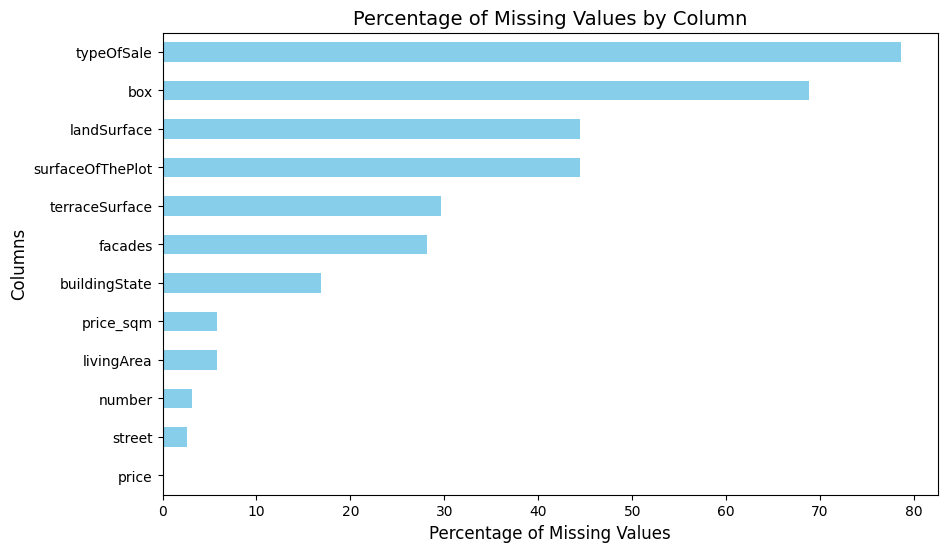

<Figure size 640x480 with 0 Axes>

In [445]:
#Average % of missing values per column
import matplotlib.pyplot as plt
def avg_missing_values(df, column):
    print(f'average % of missing values in {column} column is {(df[column].isna().sum() / len(df[column])) * 100}')
    return (df[column].isna().sum() / len(df[column])) * 100

def avg_missing_values_all(df):
    missing_percentages = (df.isna().sum() / len(df)) * 100
    avg_missing = missing_percentages.mean() 
    print(f'Average % of missing values across all columns is {avg_missing:.2f}%')
    return avg_missing
avg_missing_values_all(df)

avg_missing_values(df, 'price')
avg_missing_values(df, 'bedrooms')
avg_missing_values(df, 'property_type')
avg_missing_values(df, 'property_subtype')
avg_missing_values(df, 'locality')
avg_missing_values(df, 'postal_code')
avg_missing_values(df, 'street')
avg_missing_values(df, 'kitchen')
avg_missing_values(df, 'facades')
avg_missing_values(df, 'furnished')
avg_missing_values(df, 'terrace')
avg_missing_values(df, 'terraceSurface')
avg_missing_values(df, 'fireplace')
avg_missing_values(df, 'fireplaceCount')
avg_missing_values(df, 'buildingState')
avg_missing_values(df, 'garden')
avg_missing_values(df, 'gardenSurface')
avg_missing_values(df, 'pool')
avg_missing_values(df, 'landSurface')
avg_missing_values(df, 'livingArea')


missing_percent = df.isna().mean() * 100

missing_percent = missing_percent[missing_percent > 0]


plt.figure(figsize=(10, 6))
missing_percent.sort_values().plot(kind='barh', color='skyblue')
plt.title('Percentage of Missing Values by Column', fontsize=14)
plt.xlabel('Percentage of Missing Values', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.show()
plt.savefig("plotted_missing_values")

In [446]:

#Removing outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_without_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f'{len(df) - len(df_without_outliers)} rows have been removed from the {column} column')
    return df_without_outliers
df_without_outliers = remove_outliers(df, 'price')
df_without_outliers = remove_outliers(df_without_outliers, 'livingArea')








1279 rows have been removed from the price column
1434 rows have been removed from the livingArea column


In [468]:
#Checking correlation with price with outliers
df_numeric = df.select_dtypes(include=['float64', 'int64']) 
correlation_matrix = df_numeric.corr()
print(f"With outliers:\n{correlation_matrix['price'].sort_values(ascending=False)}")

With outliers:
price               1.000000
price_sqm           0.598080
livingArea          0.434857
landSurface         0.345216
surfaceOfThePlot    0.345216
bedrooms            0.345065
pool                0.243387
facades             0.207117
fireplace           0.107598
house_index         0.098273
gardenSurface       0.078910
terraceSurface      0.073208
terrace             0.056967
garden              0.031509
furnished           0.003637
fireplaceCount      0.003164
kitchen            -0.030279
Name: price, dtype: float64


In [448]:
#Checking correlation with price without outliers
df_numeric_without_outliers = df_without_outliers.select_dtypes(include=['float64', 'int64']) 
correlation_matrix_without_outliers = df_numeric_without_outliers.corr()
print(f"Without outliers:\n{correlation_matrix_without_outliers['price'].sort_values(ascending=False)}")

Without outliers:
price               1.000000
livingArea          0.535722
bedrooms            0.423086
price_sqm           0.393447
facades             0.261735
landSurface         0.207095
surfaceOfThePlot    0.207095
house_index         0.146955
fireplace           0.138337
pool                0.131048
garden              0.124956
terrace             0.109215
gardenSurface       0.059234
terraceSurface      0.058917
kitchen             0.013860
fireplaceCount      0.007523
furnished          -0.039011
Name: price, dtype: float64


#### GPD WITH OUTLIERS

In [449]:
#Creating a Geopandas dataframe with desired columns and merge postcodes
import geopandas as gpd
gdf = gpd.read_file("postaldistricts.shp")
 # Check type in df
print(df['postal_code'].dtype) 
# Check type in gdf
print(gdf['nouveau_PO'].dtype)  

df['postal_code'] = df['postal_code'].astype(str)
gdf['nouveau_PO'] = gdf['nouveau_PO'].astype(str)

gdf = gdf.merge(df[['postal_code', 'price','price_sqm', 'livingArea']], 
                 left_on='nouveau_PO', 
                 right_on='postal_code', 
                 how='left')

object
object


#### GPD WITHOUT OUTLIERS

In [450]:
#Creating a Geopandas dataframe without outliers with desired columns and merge postcodes
import geopandas as gpd
gdf_without_outliers = gpd.read_file("postaldistricts.shp")
 # Check type in df_without_outliers
print(df_without_outliers['postal_code'].dtype) 
# Check type in gdf_without_outliers
print(gdf_without_outliers['nouveau_PO'].dtype)  

df_without_outliers['postal_code'] = df_without_outliers['postal_code'].astype(str)
gdf_without_outliers['nouveau_PO'] = gdf_without_outliers['nouveau_PO'].astype(str)

gdf_without_outliers = gdf_without_outliers.merge(df_without_outliers[['postal_code', 'price','price_sqm', 'livingArea']], 
                 left_on='nouveau_PO', 
                 right_on='postal_code', 
                 how='left')

object
object


In [451]:
#Setting VMIN & VMAX with outliers
vmin_with_outliers_price = gdf['price'].quantile(0.05)  
vmax_with_outliers_price = gdf['price'].quantile(0.90) 
vmin_with_outliers_sqm = gdf['price_sqm'].quantile(0.05)  
vmax_with_outliers_sqm = gdf['price_sqm'].quantile(0.90)  

In [452]:
#Setting VMIN & VMAX without outliers
vmin_without_outliers_price = gdf_without_outliers['price'].quantile(0.05)  
vmax_without_outliers_price = gdf_without_outliers['price'].quantile(0.9) 
vmin_without_outliers_sqm = gdf_without_outliers['price_sqm'].quantile(0.05)  
vmax_without_outliers_sqm = gdf_without_outliers['price_sqm'].quantile(0.90)  

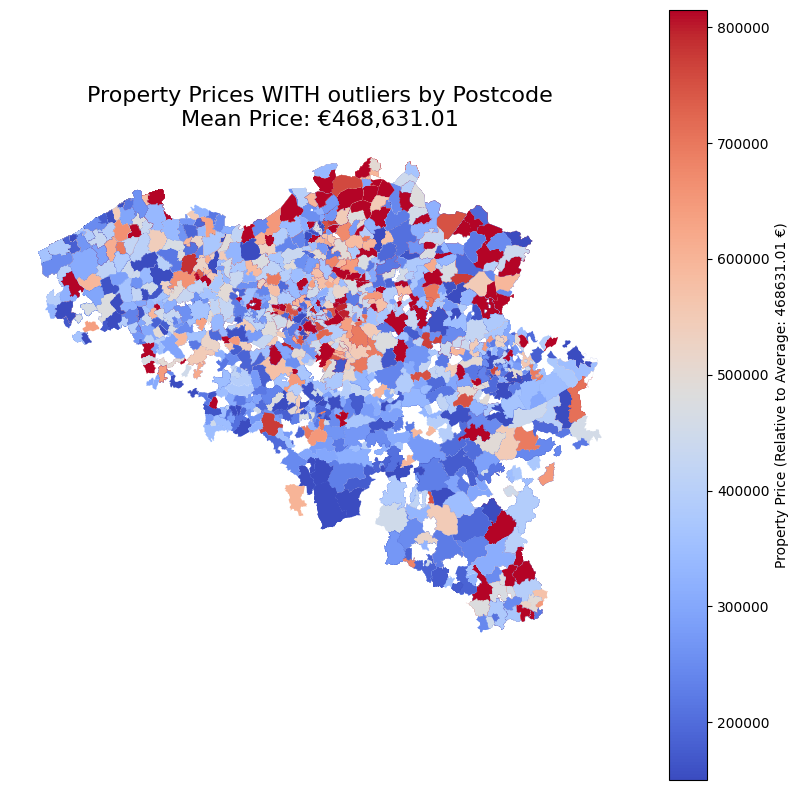

In [453]:
#Plot with outliers based on mean price property
mean_price_filtered = gdf['price'].mean()

# Plot with legend and mean price in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    column='price', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price (Relative to Average: {mean_price_filtered:.2f} €)"},
    ax=ax, 
    edgecolor=None,
    vmin=vmin_with_outliers_price,
    vmax=vmax_with_outliers_price
)

# Add a title
plt.title(f"Property Prices WITH outliers by Postcode\nMean Price: €{mean_price_filtered:,.2f}", fontsize=16)
plt.axis('off')

plt.savefig("mean-price-with-outliers.jpg")

Index(['Join_Count', 'nouveau_PO', 'FREQUENCY', 'CP_speciau', 'Shape_Leng',
       'Shape_Area', 'geometry', 'postal_code', 'price', 'price_sqm',
       'livingArea'],
      dtype='object')


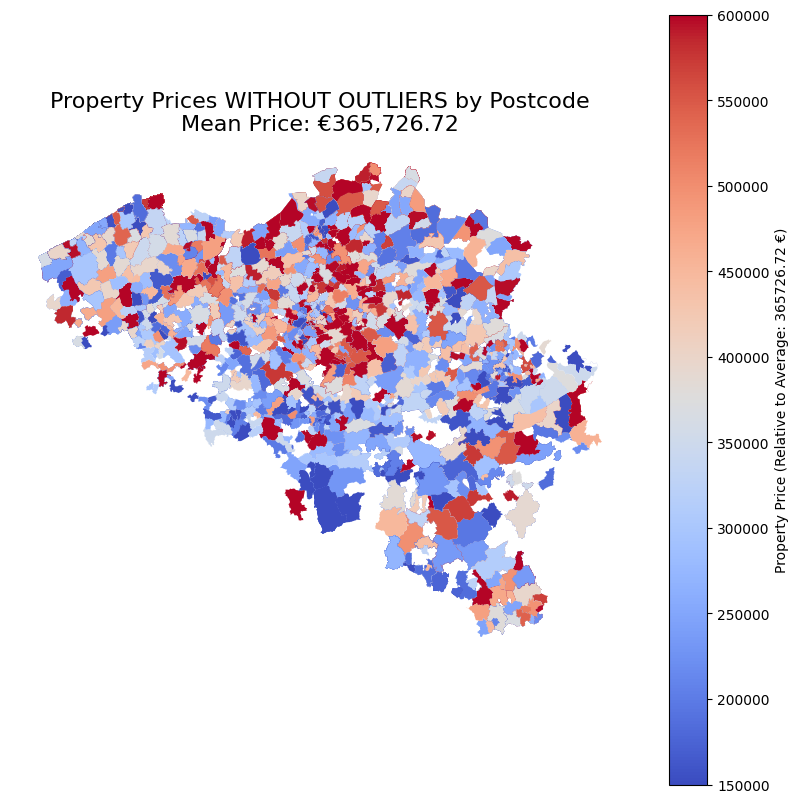

In [454]:
#Plot without outliers based on mean price property
mean_price_filtered = gdf_without_outliers['price'].mean()

# Plot with legend and mean price in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf_without_outliers.plot(
    column='price', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price (Relative to Average: {mean_price_filtered:.2f} €)"},
    ax=ax, 
    edgecolor=None,
    vmin=vmin_without_outliers_price,
    vmax=vmax_without_outliers_price

)

# Add a title
plt.title(f"Property Prices WITHOUT OUTLIERS by Postcode\nMean Price: €{mean_price_filtered:,.2f}", fontsize=16)
plt.axis('off')

print(gdf_without_outliers.columns)
plt.savefig("mean-price-without-outliers.jpg")

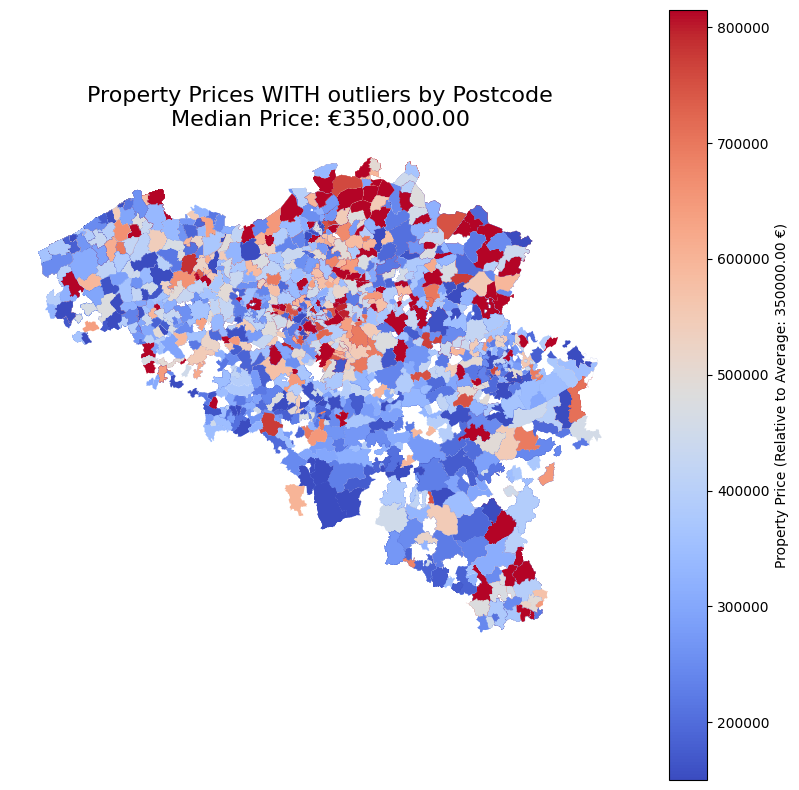

In [455]:
#Plot with outliers based on median price property
median_price_filtered = gdf['price'].median()

# Plot with legend and mean price in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    column='price', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price (Relative to Average: {median_price_filtered:.2f} €)"},
    ax=ax, 
    edgecolor=None,
    vmin=vmin_with_outliers_price,
    vmax=vmax_with_outliers_price
)

# Add a title
plt.title(f"Property Prices WITH outliers by Postcode\nMedian Price: €{median_price_filtered:,.2f}", fontsize=16)
plt.axis('off')
plt.savefig("median-price-with-outliers.jpg")


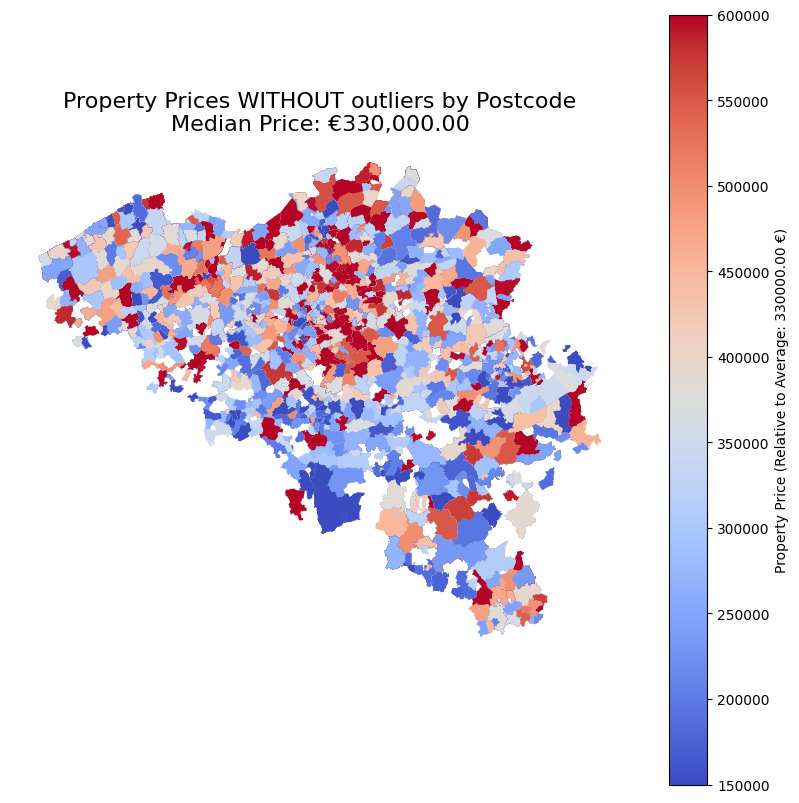

In [456]:
#Plot without outliers based on median price property
median_price_filtered = gdf_without_outliers['price'].median()

# Plot with legend and mean price in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf_without_outliers.plot(
    column='price', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price (Relative to Average: {median_price_filtered:.2f} €)"},
    ax=ax, 
    edgecolor=None,
    vmin=vmin_without_outliers_price,
    vmax=vmax_without_outliers_price
)

# Add a title
plt.title(f"Property Prices WITHOUT outliers by Postcode\nMedian Price: €{median_price_filtered:,.2f}", fontsize=16)
plt.axis('off')
plt.savefig("median-price-without-outliers.jpg")

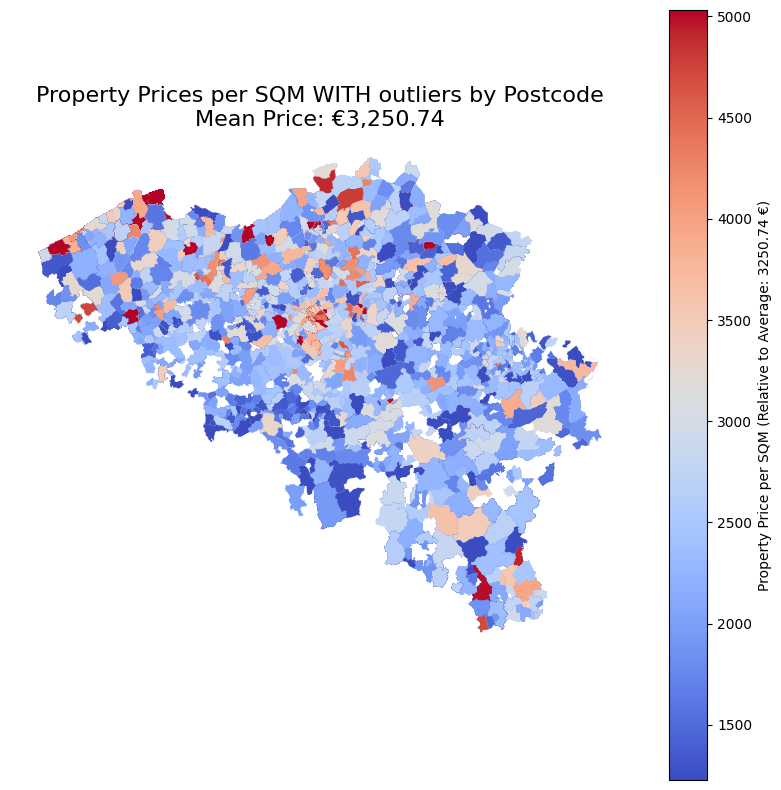

In [457]:
#Plot with outliers based on mean price per sqm per property
mean_price_sqm = gdf['price_sqm'].mean()

# Plot with legend and mean price_sqm in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    column='price_sqm', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price per SQM (Relative to Average: {mean_price_sqm:.2f} €)"},
    ax=ax, 
    edgecolor=None,
    vmin=vmin_with_outliers_sqm,
    vmax=vmax_with_outliers_sqm
)

# Add a title
plt.title(f"Property Prices per SQM WITH outliers by Postcode\nMean Price: €{mean_price_sqm:,.2f}", fontsize=16)
plt.axis('off')

plt.savefig("mean-price_sqm-with-outliers.jpg")

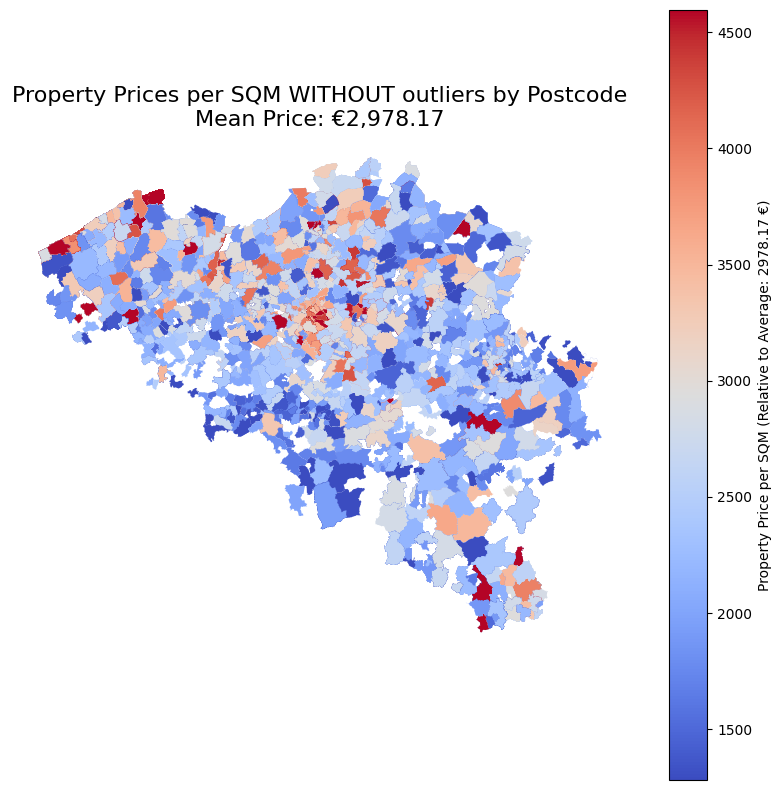

In [ ]:
#Plot without outliers based on mean price per sqm per property
mean_price_sqm = gdf_without_outliers['price_sqm'].mean()

# Plot with legend and mean price_sqm in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf_without_outliers.plot(
    column='price_sqm', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price per SQM (Relative to Average: {mean_price_sqm:.2f} €)"},
    ax=ax, 
    edgecolor=None,
    vmin=vmin_without_outliers_sqm,
    vmax=vmax_without_outliers_sqm
)

# Add a title
plt.title(f"Property Prices per SQM WITHOUT outliers by Postcode\nMean Price: €{mean_price_sqm:,.2f}", fontsize=16)
plt.axis('off')

plt.savefig("mean-price_sqm-without-outliers.jpg")

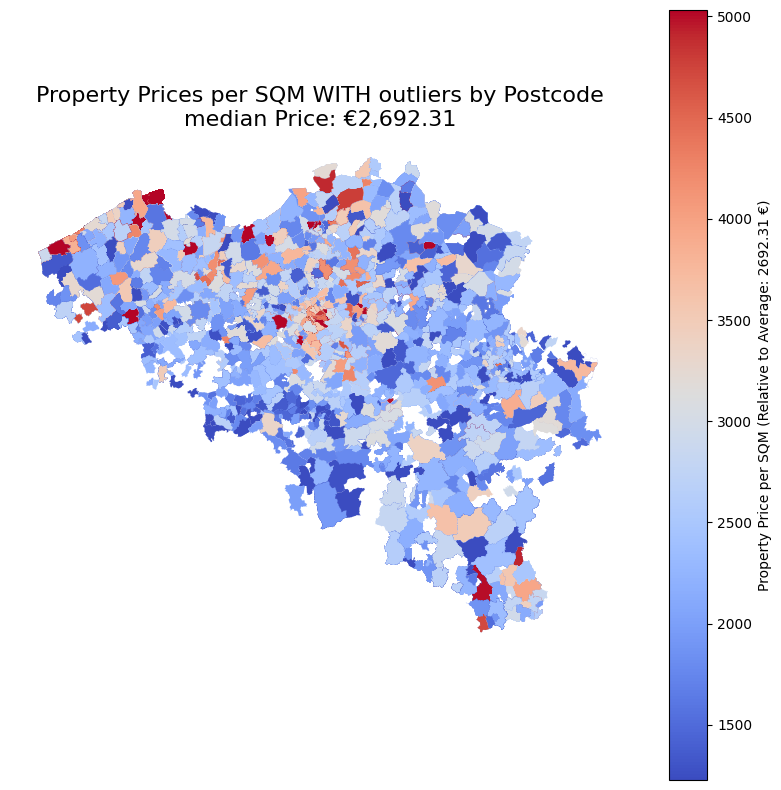

In [ ]:
#Plot with outliers based on median price per sqm per property
median_price_sqm = gdf['price_sqm'].median()

# Plot with legend and median price_sqm in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    column='price_sqm', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price per SQM (Relative to Average: {median_price_sqm:.2f} €)"},
    ax=ax, 
    edgecolor=None,
    vmin=vmin_with_outliers_sqm,
    vmax=vmax_with_outliers_sqm
)

# Add a title
plt.title(f"Property Prices per SQM WITH outliers by Postcode\nmedian Price: €{median_price_sqm:,.2f}", fontsize=16)
plt.axis('off')

plt.savefig("median-price_sqm-with-outliers.jpg")

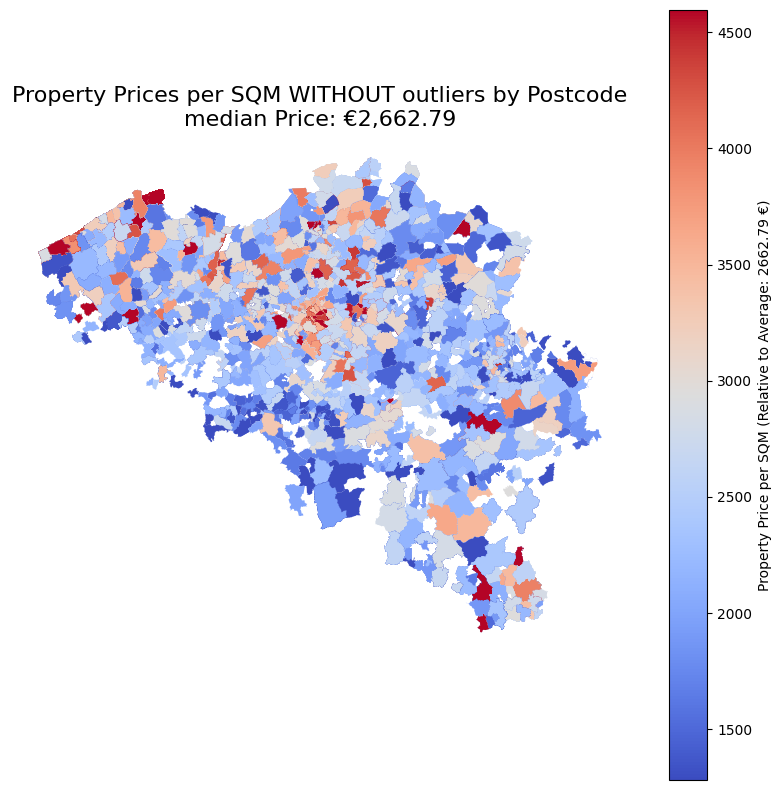

In [ ]:
#Plot without outliers based on median price per sqm per property
median_price_sqm = gdf_without_outliers['price_sqm'].median()

# Plot without legend and median price_sqm in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf_without_outliers.plot(
    column='price_sqm', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price per SQM (Relative to Average: {median_price_sqm:.2f} €)"},
    ax=ax, 
    edgecolor=None,
    vmin=vmin_without_outliers_sqm,
    vmax=vmax_without_outliers_sqm
)

# Add a title
plt.title(f"Property Prices per SQM WITHOUT outliers by Postcode\nmedian Price: €{median_price_sqm:,.2f}", fontsize=16)
plt.axis('off')

plt.savefig("median-price_sqm-without-outliers.jpg")

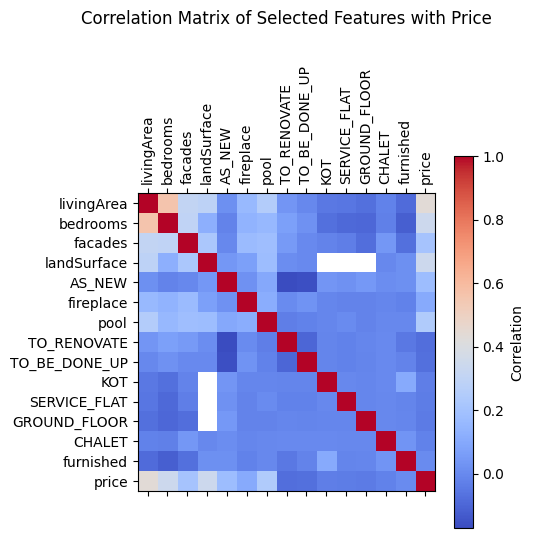

In [474]:
selected_columns = ['livingArea', 'bedrooms', 'facades', 'landSurface', 'AS_NEW', 'fireplace', 'pool', 'TO_RENOVATE', 'TO_BE_DONE_UP', 'KOT', 'SERVICE_FLAT', 'GROUND_FLOOR', 'CHALET', 'furnished']
correlation_matrix = df[selected_columns + ['price']].corr()
sorted_correlation = correlation_matrix['price'].sort_values(ascending=False)

plt.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix of Selected Features with Price', pad=30)

# Update tick labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.show()

Most expensive municipalities by mean price in Wallonia are:
    municipality_code  average_price   locality
107             61081       712000.0     Tinlot
21              25119       646000.0      Lasne
83              57094       620000.0  Grandmetz
69              56016       600000.0     Chimay
171             82005       590000.0   Bertogne


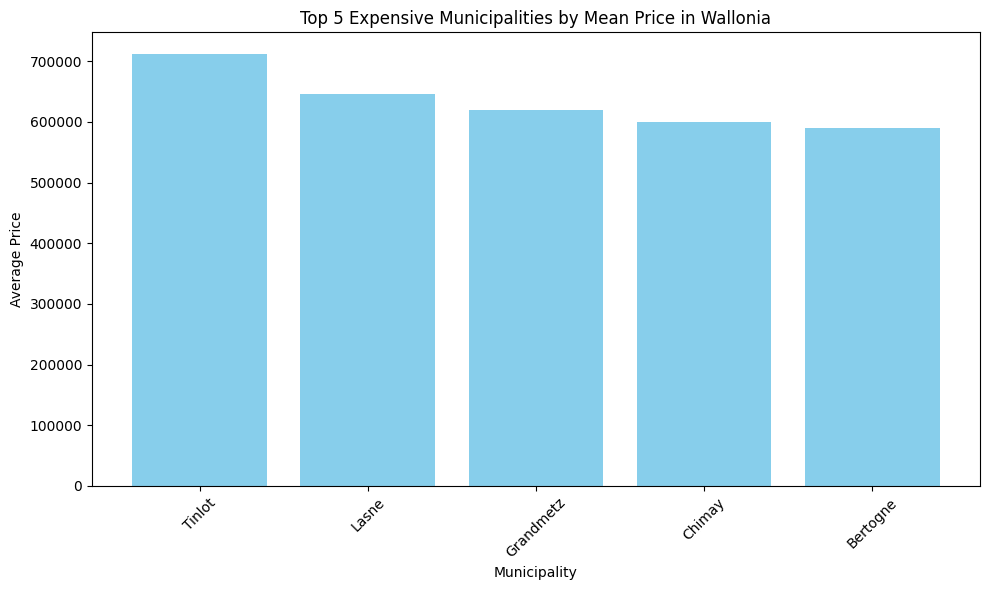

Most expensive municipalities by mean price in Flanders are:
    municipality_code  average_price                locality
99              23103  659722.222222         Wezembeek-Oppem
0                      645000.000000  Hoogstraten Minderhout
95              23099  623000.000000                Kraainem
141             31043  621650.588235                  Knokke
232             44064  593227.666667      Sint-Martens-Latem


<Figure size 640x480 with 0 Axes>

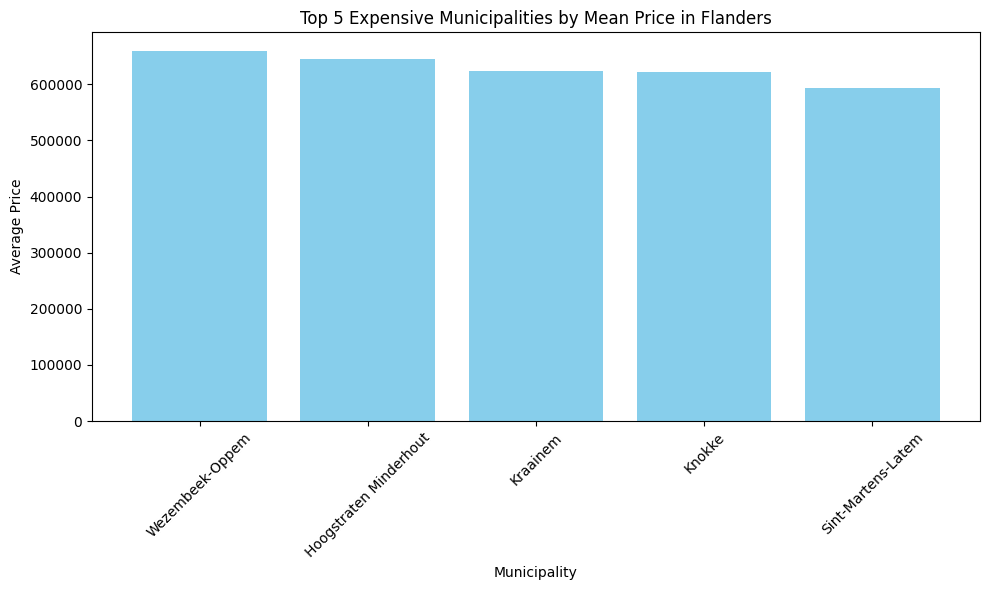

Most expensive municipalities by mean price in Brussels are:
   municipality_code  average_price              locality
18             21019  522710.000000   Woluwe-Saint-Pierre
12             21013  466719.298246               Ixelles
15             21016  466310.218978                 Uccle
16             21017  443812.500000   Watermael-Boitsfort
17             21018  428341.463415  Woluwe-Saint-Lambert


<Figure size 640x480 with 0 Axes>

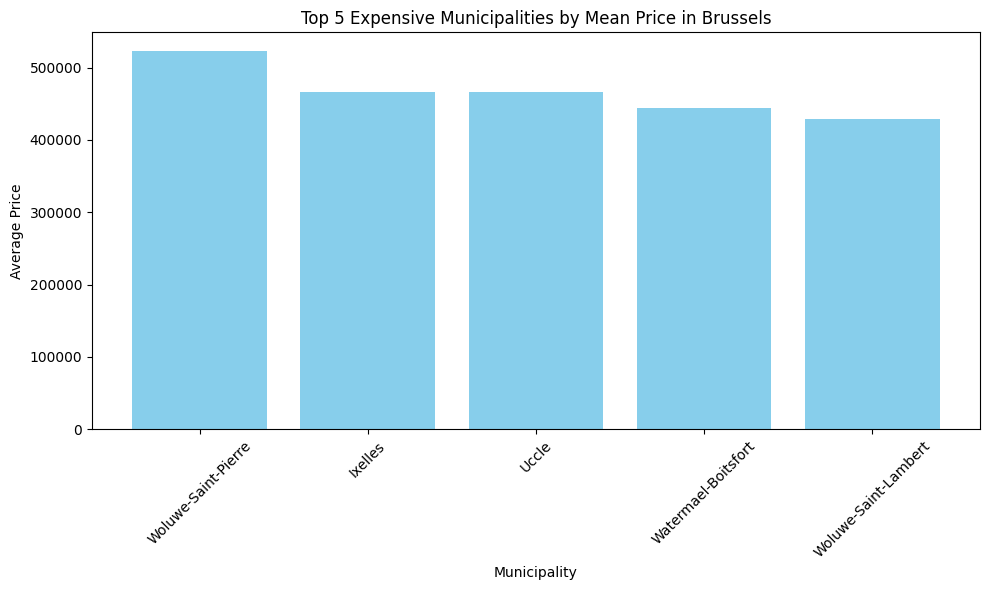

<Figure size 640x480 with 0 Axes>

In [475]:
#Most expensive municipalities MEAN

def top_5_expensive_municipalities_by_region_mean(df, region_name):

    df_region = df[df['region'] == region_name]

    average_price_by_municipality = df_region.groupby('municipality_code', as_index=False).agg(
        average_price=('price', 'mean'),
        locality=('locality', 'first')  
    )
    
    top_5_municipalities = average_price_by_municipality.sort_values(by='average_price', ascending=False).head(5)
    
    print(f'Most expensive municipalities by mean price in {region_name} are:')
    print(top_5_municipalities)
    
      
    plt.figure(figsize=(10, 6))
    plt.bar(top_5_municipalities['locality'], top_5_municipalities['average_price'], color='skyblue')
    plt.xlabel('Municipality')
    plt.ylabel('Average Price')
    plt.title(f'Top 5 Expensive Municipalities by Mean Price in {region_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.savefig(f'top5_mean_{region_name}.jpg')

    return top_5_municipalities

top_5_wallonia = top_5_expensive_municipalities_by_region_mean(df_without_outliers, 'Wallonia')
top_5_flanders = top_5_expensive_municipalities_by_region_mean(df_without_outliers, 'Flanders')
top5_brussels = top_5_expensive_municipalities_by_region_mean(df_without_outliers, 'Brussels')




Most expensive municipalities by median price in Wallonia are:
    municipality_code  average_price                locality
107             61081       712000.0                  Tinlot
47              52074       699000.0            Pont-De-Loup
21              25119       695000.0                   Lasne
83              57094       620000.0               Grandmetz
75              56086       605000.0  Ham-Sur-Heure-Nalinnes


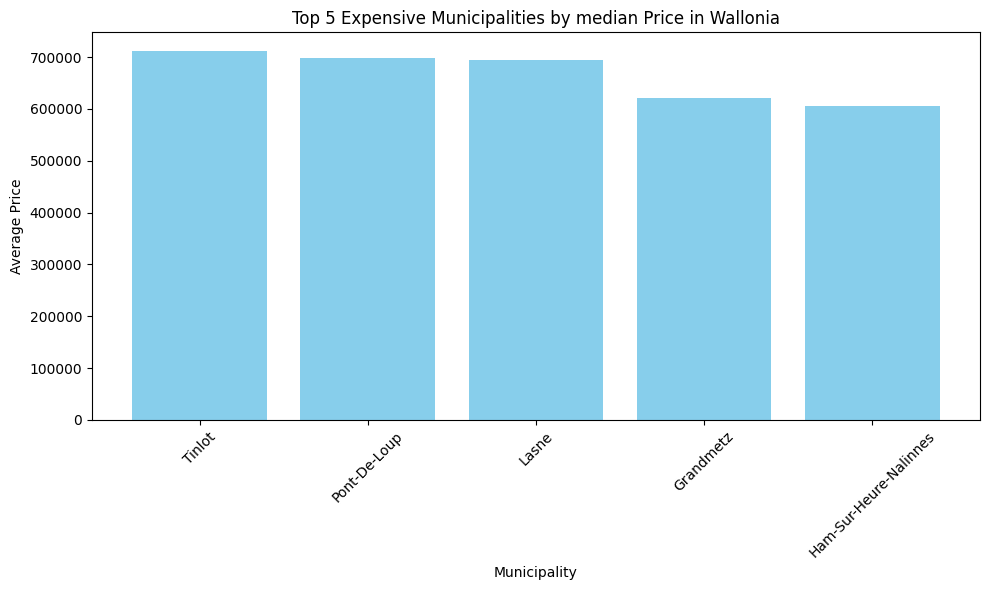

Most expensive municipalities by median price in Flanders are:
    municipality_code  average_price                locality
99              23103       695000.0         Wezembeek-Oppem
0                           645000.0  Hoogstraten Minderhout
141             31043       622500.0                  Knokke
95              23099       598000.0                Kraainem
21              11039       590000.0                 Schilde


<Figure size 640x480 with 0 Axes>

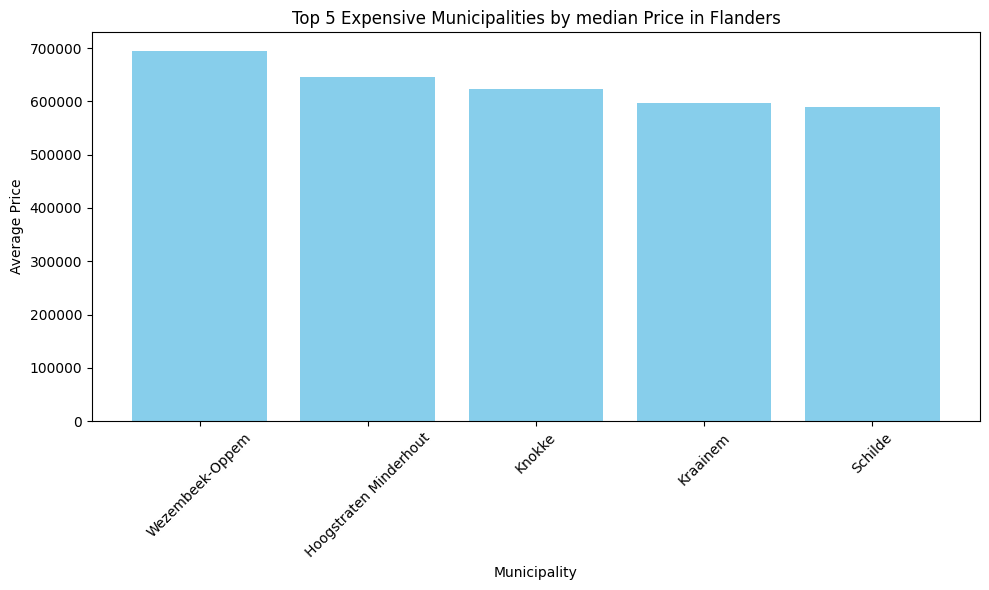

Most expensive municipalities by median price in Brussels are:
   municipality_code  average_price              locality
18             21019       525000.0   Woluwe-Saint-Pierre
12             21013       425000.0               Ixelles
16             21017       422500.0   Watermael-Boitsfort
15             21016       420000.0                 Uccle
17             21018       399000.0  Woluwe-Saint-Lambert


<Figure size 640x480 with 0 Axes>

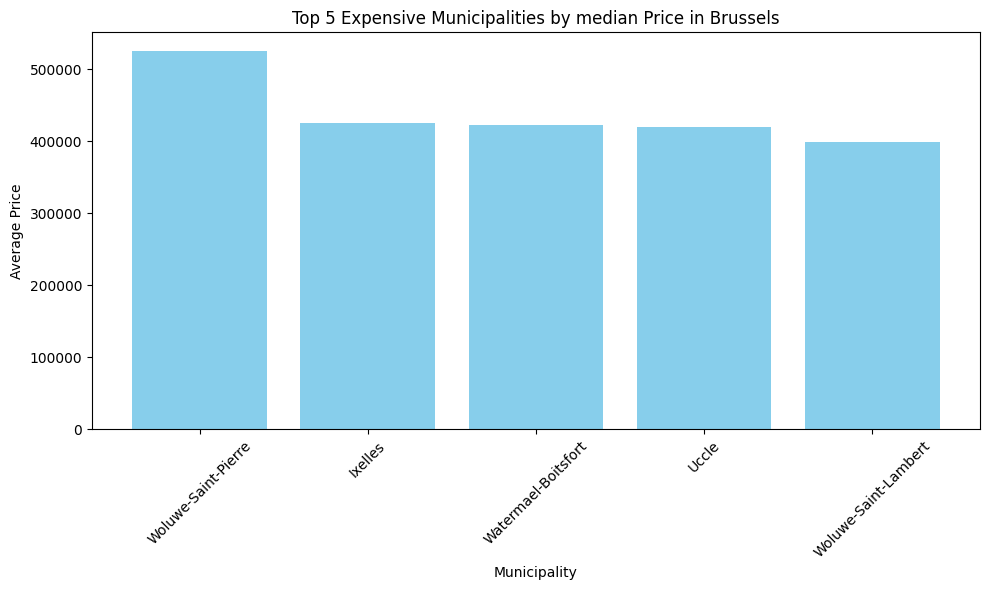

<Figure size 640x480 with 0 Axes>

In [460]:
#Most expensive municipalities MEDIAN

def top_5_expensive_municipalities_by_region_median(df, region_name):

    df_region = df[df['region'] == region_name]

    average_price_by_municipality = df_region.groupby('municipality_code', as_index=False).agg(
        average_price=('price', 'median'),
        locality=('locality', 'first')  
    )
    
    top_5_municipalities = average_price_by_municipality.sort_values(by='average_price', ascending=False).head(5)
    
    print(f'Most expensive municipalities by median price in {region_name} are:')
    print(top_5_municipalities)
    
    plt.figure(figsize=(10, 6))
    plt.bar(top_5_municipalities['locality'], top_5_municipalities['average_price'], color='skyblue')
    plt.xlabel('Municipality')
    plt.ylabel('Average Price')
    plt.title(f'Top 5 Expensive Municipalities by median Price in {region_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.savefig(f'top5_median_{region_name}.jpg')


    return top_5_municipalities
top_5_wallonia = top_5_expensive_municipalities_by_region_median(df_without_outliers, 'Wallonia')
top_5_flanders = top_5_expensive_municipalities_by_region_median(df_without_outliers, 'Flanders')
top5_brussels = top_5_expensive_municipalities_by_region_median(df_without_outliers, 'Brussels')

Most expensive municipalities by price per square meter in Wallonia are:
    municipality_code  average_price                    locality
134             63023    3752.688172                       Eupen
23              25121    3683.220509  Ottignies-Louvain-La-Neuve
4               25023    3639.455782         Court-Saint-Etienne
205             85047    3534.340659                     Rouvroy
19              25117    3514.272560                     Chastre


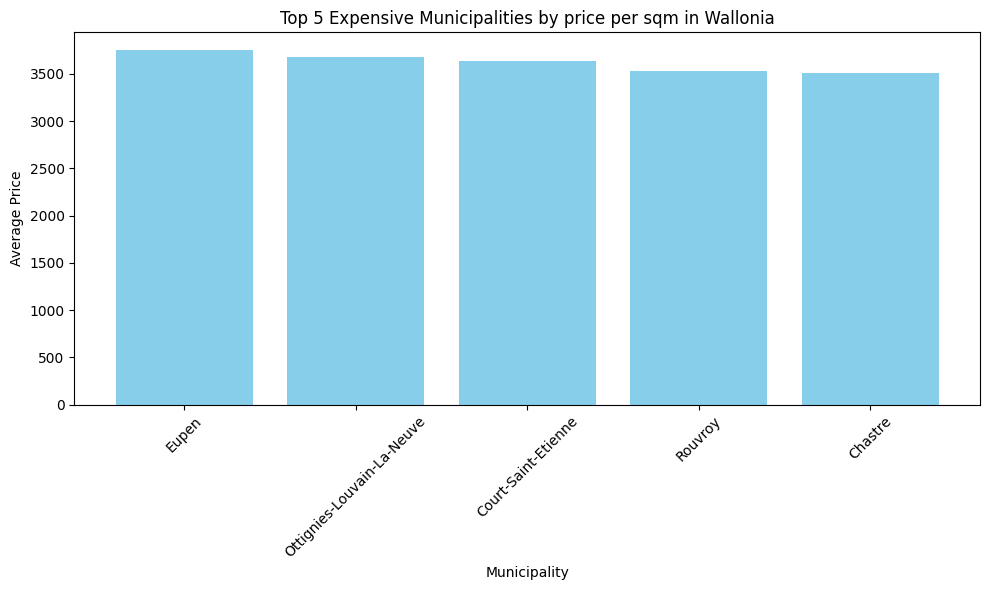

Most expensive municipalities by price per square meter in Flanders are:
    municipality_code  average_price       locality
141             31043    7675.863973         Knokke
120             24062    4834.567262         Leuven
193             38016    4423.856877     Nieuwpoort
169             35011    3875.723325    Middelkerke
192             38014    3855.308141  Oostduinkerke


<Figure size 640x480 with 0 Axes>

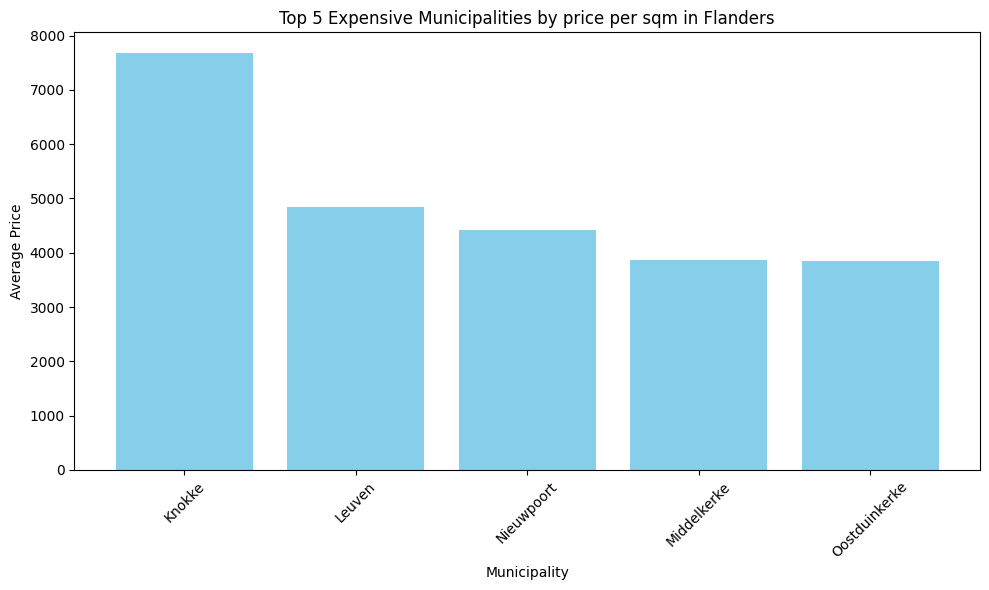

Most expensive municipalities by price per square meter in Brussels are:
   municipality_code  average_price              locality
4              21005    4307.237071             Etterbeek
12             21013    4287.257099               Ixelles
8              21009    4188.650360               Brussel
1              21002    4002.968702             Auderghem
17             21018    3945.946550  Woluwe-Saint-Lambert


<Figure size 640x480 with 0 Axes>

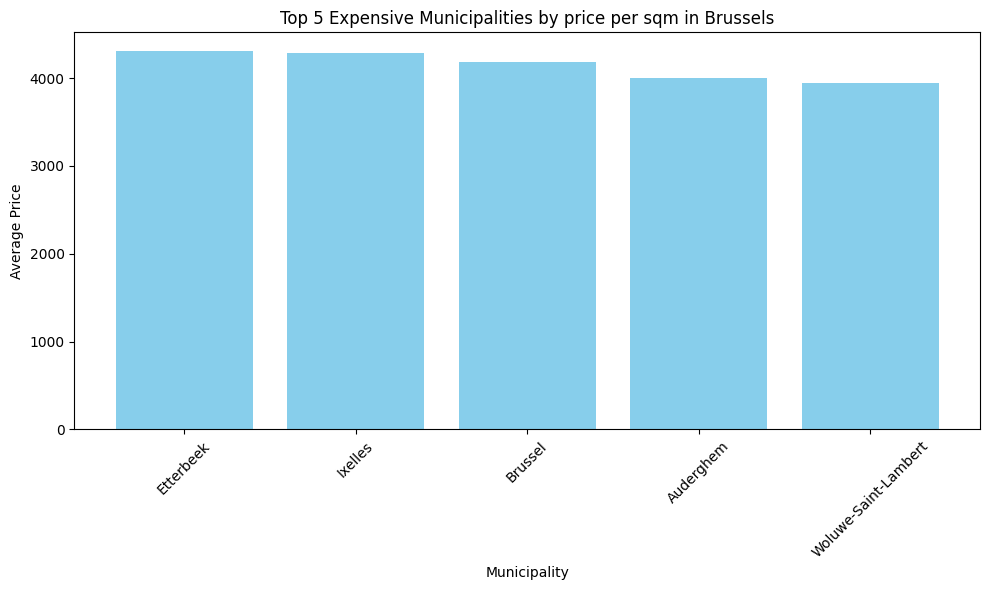

<Figure size 640x480 with 0 Axes>

In [461]:
#Most expensive municipalities SQM

def top_5_expensive_localities_by_region_sqm(df, region_name):

    df_region = df[df['region'] == region_name]

    average_price_by_municipality = df_region.groupby('municipality_code', as_index=False).agg(
        average_price=('price_sqm', 'mean'),
        locality=('locality', 'first')  
    )
    
    top_5_municipalities = average_price_by_municipality.sort_values(by='average_price', ascending=False).head(5)
    
    print(f'Most expensive municipalities by price per square meter in {region_name} are:')
    print(top_5_municipalities)

    plt.figure(figsize=(10, 6))
    plt.bar(top_5_municipalities['locality'], top_5_municipalities['average_price'], color='skyblue')
    plt.xlabel('Municipality')
    plt.ylabel('Average Price')
    plt.title(f'Top 5 Expensive Municipalities by price per sqm in {region_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.savefig(f'top5_sqm_{region_name}.jpg')

    
    return top_5_municipalities

top_5_wallonia = top_5_expensive_localities_by_region_sqm(df_without_outliers, 'Wallonia')
top_5_flanders = top_5_expensive_localities_by_region_sqm(df_without_outliers, 'Flanders')
top5_brussels = top_5_expensive_localities_by_region_sqm(df_without_outliers, 'Brussels')

Least expensive municipalities by mean price in Wallonia are:
    municipality_code  average_price   locality
240             93090        45000.0  Viroinval
80              57064        70000.0   Peruwelz
58              53082        72500.0     Wasmes
141             63061       100000.0     Raeren
76              57003       110000.0    Antoing


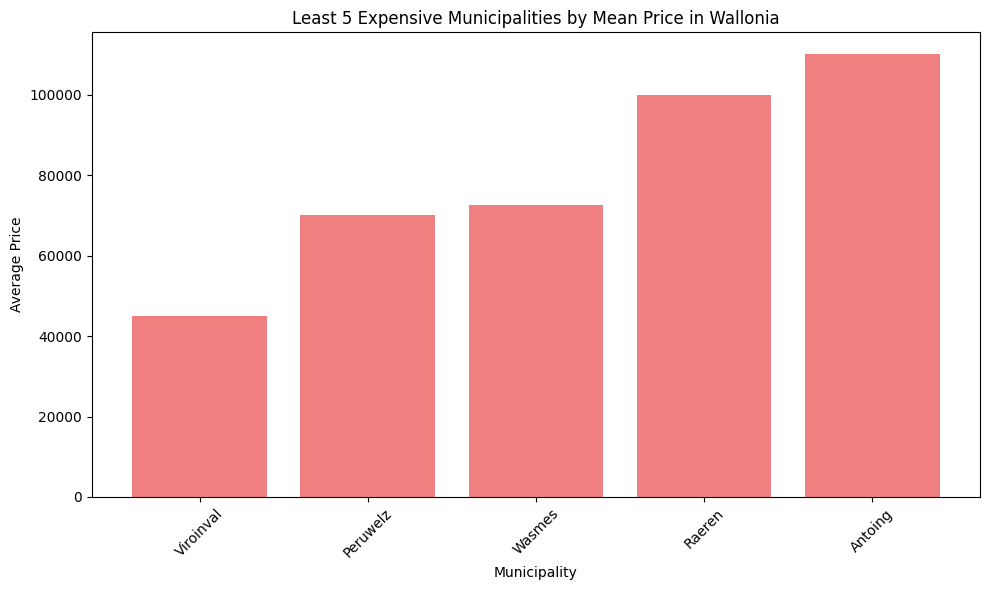

Least expensive municipalities by mean price in Flanders are:
    municipality_code  average_price    locality
190             38002  189000.000000  Alveringem
287             73022  217200.000000       Heers
149             33029  219250.000000      Geluwe
161             34027  224909.090909       Menen
127             24130  230200.000000   Zoutleeuw


<Figure size 640x480 with 0 Axes>

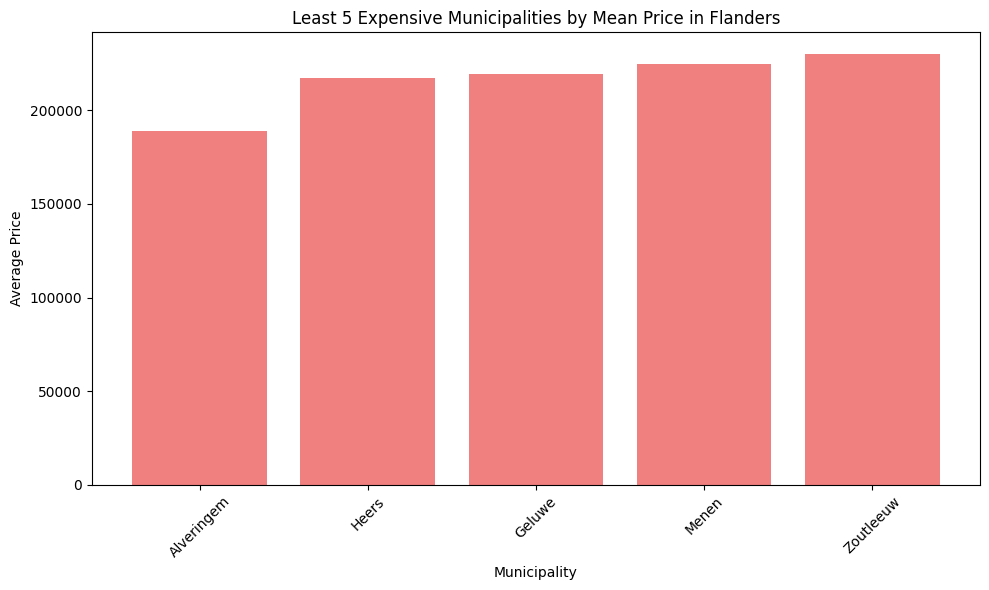

Least expensive municipalities by mean price in Brussels are:
   municipality_code  average_price              locality
10             21011  258357.142857            Koekelberg
11             21012  273722.120370  Molenbeek-Saint-Jean
7              21008  282549.800000             Ganshoren
9              21010  288157.142857                 Jette
6              21007  304462.558140                Forest


<Figure size 640x480 with 0 Axes>

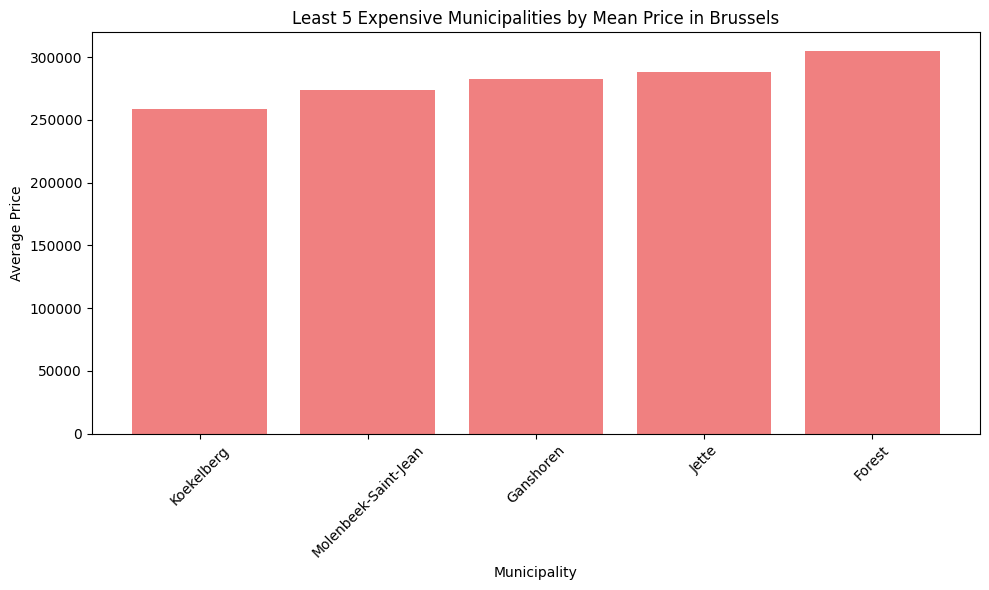

<Figure size 640x480 with 0 Axes>

In [462]:
#Least expensive municipalities MEAN

def low_5_municipalities_by_region_mean(df, region_name):

    df_region = df[df['region'] == region_name]

    average_price_by_municipality = df_region.groupby('municipality_code', as_index=False).agg(
        average_price=('price', 'mean'),
        locality=('locality', 'first')  
    )
    
    low_5_municipalities = average_price_by_municipality.sort_values(by='average_price', ascending=True).head(5)
    
    print(f'Least expensive municipalities by mean price in {region_name} are:')
    print(low_5_municipalities)
    
    plt.figure(figsize=(10, 6))
    plt.bar(low_5_municipalities['locality'], low_5_municipalities['average_price'], color='lightcoral')
    plt.xlabel('Municipality')
    plt.ylabel('Average Price')
    plt.title(f'Least 5 Expensive Municipalities by Mean Price in {region_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.savefig(f'low_5_mean{region_name}.jpg')


    return low_5_municipalities

low_5_wallonia = low_5_municipalities_by_region_mean(df_without_outliers, 'Wallonia')
low_5_flanders = low_5_municipalities_by_region_mean(df_without_outliers, 'Flanders')
low_5_brussels = low_5_municipalities_by_region_mean(df_without_outliers, 'Brussels')

Least expensive municipalities by median price in Wallonia are:
    municipality_code  average_price   locality
240             93090        45000.0  Viroinval
80              57064        70000.0   Peruwelz
58              53082        80000.0     Wasmes
141             63061       100000.0     Raeren
76              57003       110000.0    Antoing


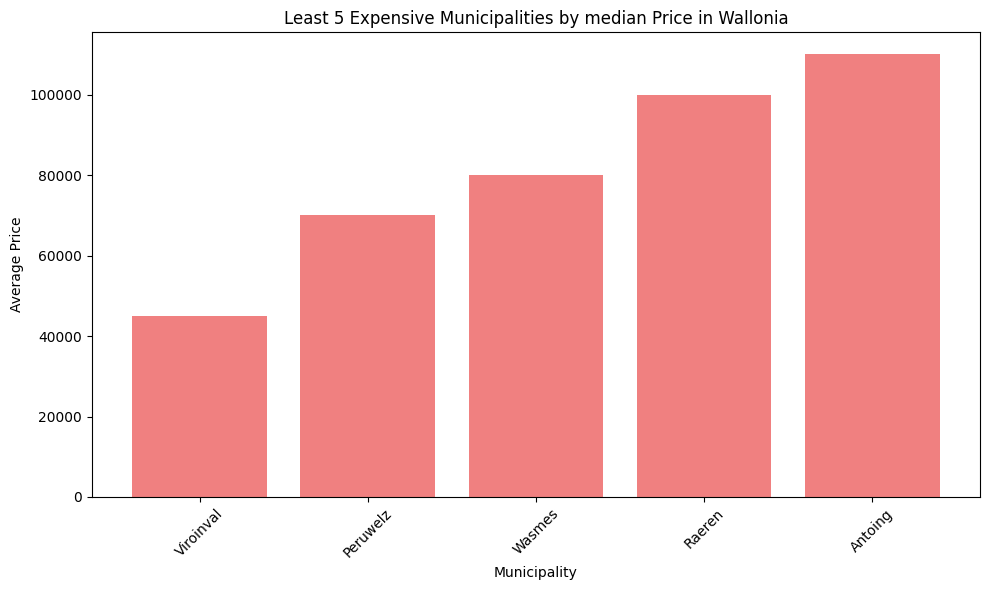

Least expensive municipalities by median price in Flanders are:
    municipality_code  average_price      locality
161             34027       179000.0         Menen
183             37010       183750.0  Oostrozebeke
190             38002       189000.0    Alveringem
149             33029       204000.0        Geluwe
147             33011       229000.0         Ieper


<Figure size 640x480 with 0 Axes>

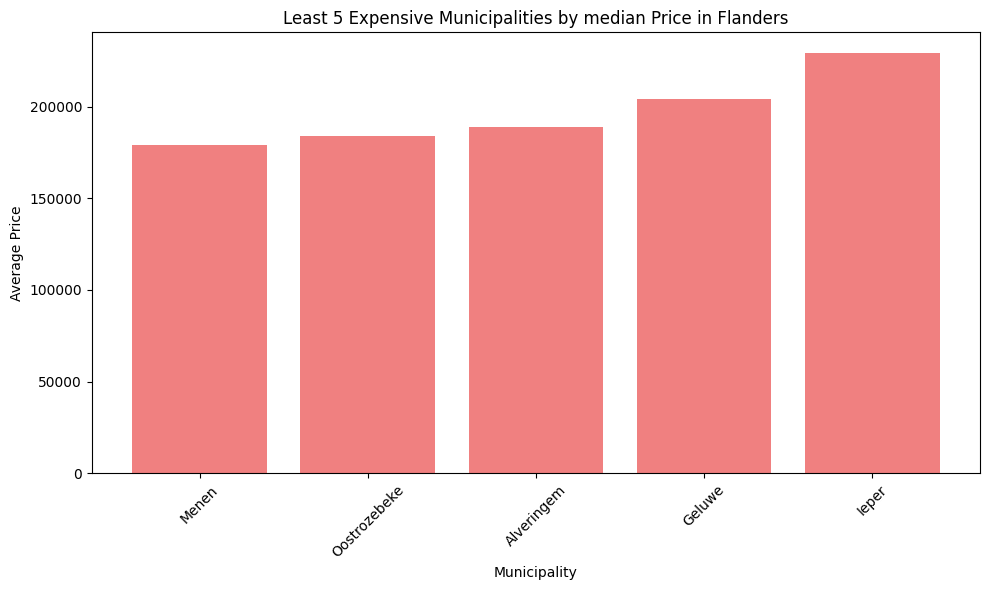

Least expensive municipalities by median price in Brussels are:
   municipality_code  average_price              locality
7              21008       240000.0             Ganshoren
11             21012       247000.0  Molenbeek-Saint-Jean
10             21011       249000.0            Koekelberg
9              21010       254000.0                 Jette
0              21001       265000.0            Anderlecht


<Figure size 640x480 with 0 Axes>

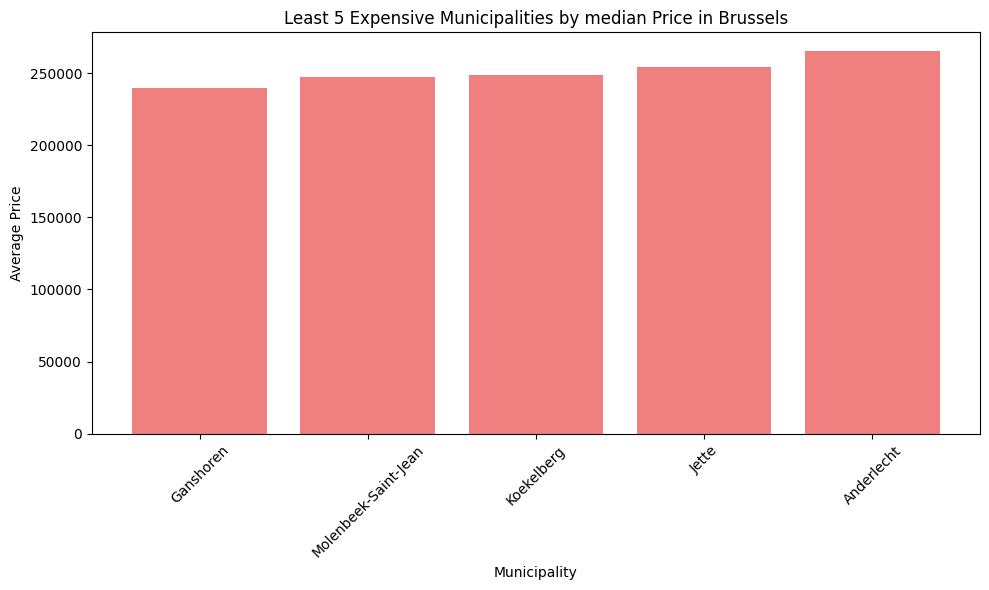

<Figure size 640x480 with 0 Axes>

In [463]:
#Least expensive municipalities Median

def low_5_municipalities_by_region_median(df, region_name):

    df_region = df[df['region'] == region_name]

    average_price_by_municipality = df_region.groupby('municipality_code', as_index=False).agg(
        average_price=('price', 'median'),
        locality=('locality', 'first')  
    )
    
    low_5_municipalities = average_price_by_municipality.sort_values(by='average_price', ascending=True).head(5)
    
    print(f'Least expensive municipalities by median price in {region_name} are:')
    print(low_5_municipalities)

    plt.figure(figsize=(10, 6))
    plt.bar(low_5_municipalities['locality'], low_5_municipalities['average_price'], color='lightcoral')
    plt.xlabel('Municipality')
    plt.ylabel('Average Price')
    plt.title(f'Least 5 Expensive Municipalities by median Price in {region_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.savefig(f'low_5_median{region_name}.jpg')

    return low_5_municipalities

low_5_wallonia = low_5_municipalities_by_region_median(df_without_outliers, 'Wallonia')
low_5_flanders = low_5_municipalities_by_region_median(df_without_outliers, 'Flanders')
low_5_brussels = low_5_municipalities_by_region_median(df_without_outliers, 'Brussels')

Least expensive municipalities by price per sqm in Wallonia are:
    municipality_code  average_price          locality
141             63061     625.000000            Raeren
114             62026     730.612245  Comblain-Au-Pont
240             93090     750.000000         Viroinval
86              57097     844.380706  Comines-Warneton
80              57064     875.000000          Peruwelz


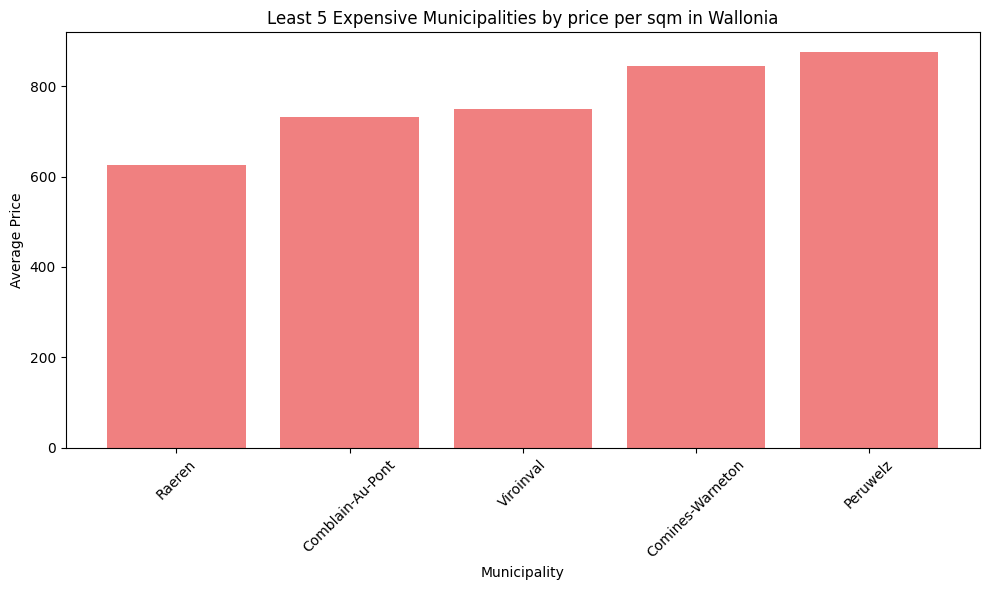

Least expensive municipalities by price per sqm in Flanders are:
    municipality_code  average_price    locality
190             38002     880.750433  Alveringem
149             33029    1144.508947      Geluwe
291             73066    1343.202239      Riemst
287             73022    1417.964440       Heers
127             24130    1423.888977   Zoutleeuw


<Figure size 640x480 with 0 Axes>

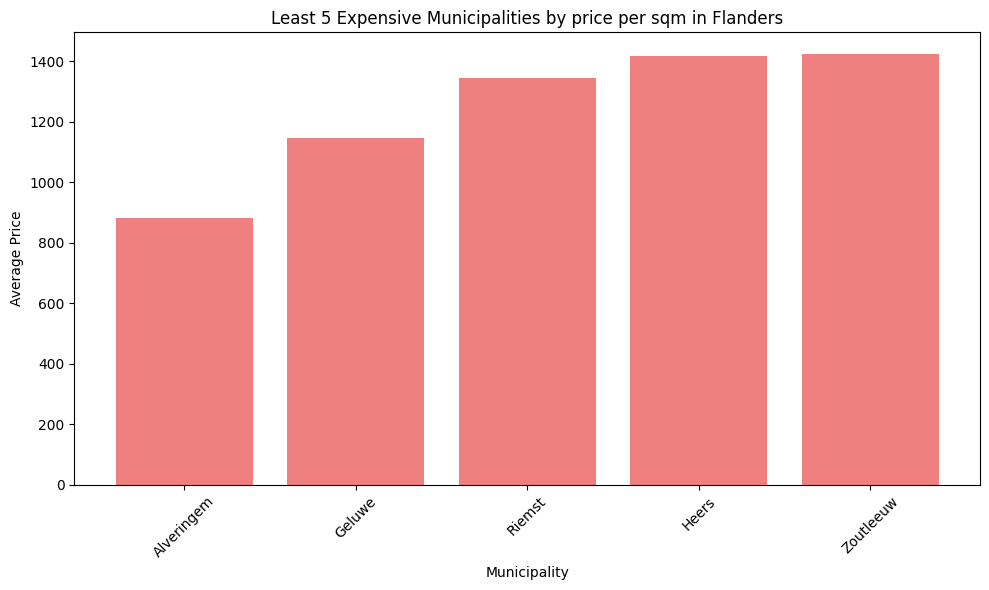

Least expensive municipalities by price per sqm in Brussels are:
   municipality_code  average_price              locality
11             21012    2698.136183  Molenbeek-Saint-Jean
10             21011    2787.280425            Koekelberg
3              21004    2833.205972                Laeken
9              21010    2864.235533                 Jette
7              21008    2865.451996             Ganshoren


<Figure size 640x480 with 0 Axes>

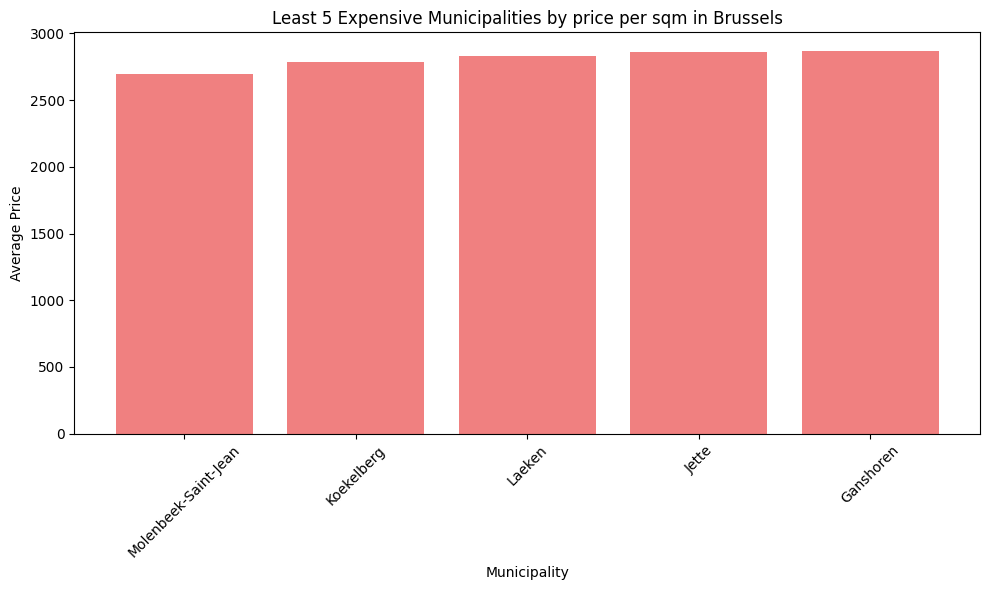

<Figure size 640x480 with 0 Axes>

In [464]:
#Least expensive municipalities Median

def low_5_municipalities_by_region_sqm(df, region_name):

    df_region = df[df['region'] == region_name]

    average_price_by_municipality = df_region.groupby('municipality_code', as_index=False).agg(
        average_price=('price_sqm', 'mean'),
        locality=('locality', 'first')  
    )
    
    low_5_municipalities = average_price_by_municipality.sort_values(by='average_price', ascending=True).head(5)
    
    print(f'Least expensive municipalities by price per sqm in {region_name} are:')
    print(low_5_municipalities)


    plt.figure(figsize=(10, 6))
    plt.bar(low_5_municipalities['locality'], low_5_municipalities['average_price'], color='lightcoral')
    plt.xlabel('Municipality')
    plt.ylabel('Average Price')
    plt.title(f'Least 5 Expensive Municipalities by price per sqm in {region_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.savefig(f'low_5_sqm{region_name}.jpg')

    
    return low_5_municipalities

low_5_wallonia = low_5_municipalities_by_region_sqm(df_without_outliers, 'Wallonia')
low_5_flanders = low_5_municipalities_by_region_sqm(df_without_outliers, 'Flanders')
low_5_brussels = low_5_municipalities_by_region_sqm(df_without_outliers, 'Brussels')

object
int32


(np.float64(508883.96141409484),
 np.float64(801371.5922489951),
 np.float64(510177.7741363927),
 np.float64(755178.5904974197))

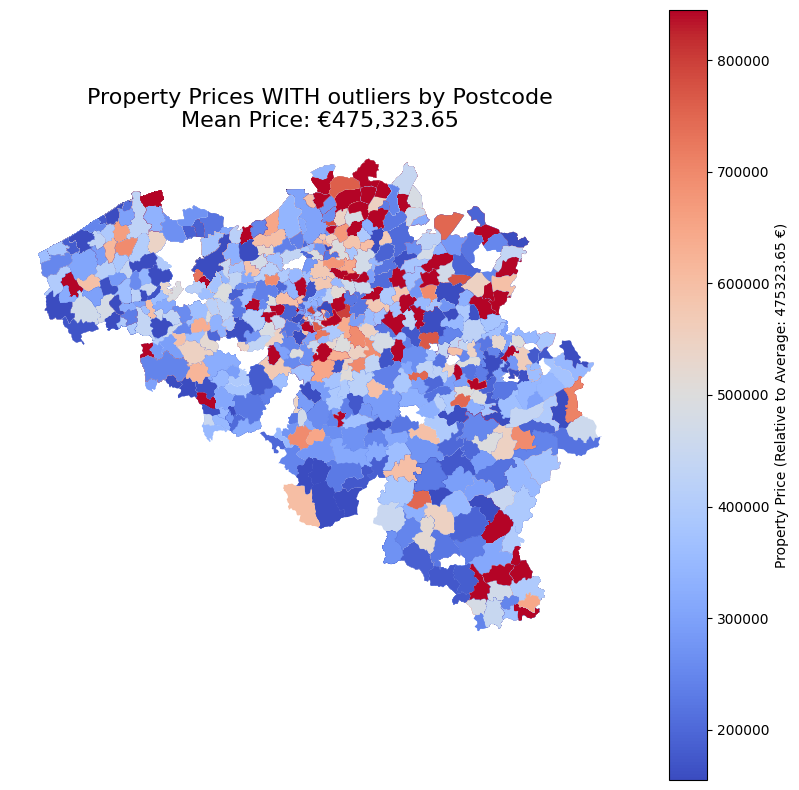

In [465]:
#Creating a Geopandas dataframe with desired columns and merge municipality codes
import geopandas as gpd
gdf_municipality = gpd.read_file("communes_L08.shp")
 # Check type in df
print(df['municipality_code'].dtype) 
# Check type in gdf_municipality
print(gdf_municipality['NSI'].dtype)  

df['municipality_code'] = df['municipality_code'].astype(str)
gdf_municipality['NSI'] = gdf_municipality['NSI'].astype(str)

gdf_municipality = gdf_municipality.merge(df[['municipality_code', 'price','price_sqm', 'livingArea']], 
                 left_on='NSI', 
                 right_on='municipality_code', 
                 how='left')
#Plot with outliers based on mean price property
mean_price_filtered = gdf_municipality['price'].mean()
vmin = gdf_municipality['price'].quantile(0.05)  
vmax = gdf_municipality['price'].quantile(0.90) 

# Plot with legend and mean price in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf_municipality.plot(
    column='price', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price (Relative to Average: {mean_price_filtered:.2f} €)"},
    ax=ax, 
    edgecolor=None,
    vmin=vmin,
    vmax=vmax
)

# Add a title
plt.title(f"Property Prices WITH outliers by Postcode\nMean Price: €{mean_price_filtered:,.2f}", fontsize=16)
plt.axis('off')

In [466]:
print(df.columns)

Index(['house_index', 'bedrooms', 'property_type', 'property_subtype',
       'locality', 'postal_code', 'street', 'number', 'box', 'kitchen',
       'facades', 'price', 'furnished', 'terrace', 'terraceSurface',
       'fireplace', 'fireplaceCount', 'buildingState', 'garden',
       'gardenSurface', 'pool', 'landSurface', 'livingArea',
       'surfaceOfThePlot', 'typeOfSale', 'municipality_code', 'region',
       'price_sqm'],
      dtype='object')
